In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

每一个样本，先随机设定3到7个正方形，

然后随机设定这些正方形的移动方向，对每个样本，它的每个frame就沿这个方向挪动

然后对每个frame的每个正方形以50%的概率加一些噪声；噪声的值等概率为0.1或者-0.1

Ground Truth数据多移动一个单位，不加噪声

In [2]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [4]:
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

In [6]:
print(noisy_movies.shape)
print(shifted_movies.shape)

(1200, 15, 40, 40, 1)
(1200, 15, 40, 40, 1)


In [11]:
X = noisy_movies[0,0,:,:,:].reshape(40,40)

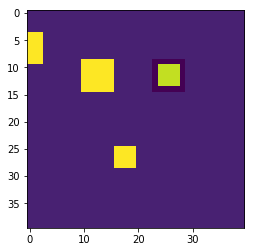

In [12]:
plt.imshow(X)

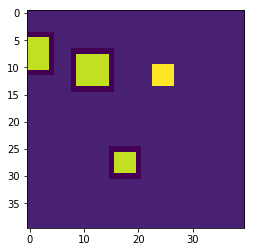

In [13]:
X1 = noisy_movies[0,1,:,:,:].reshape(40,40)
plt.imshow(X1)

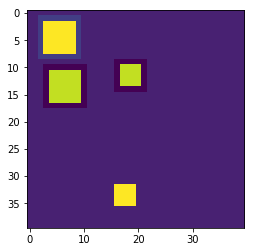

In [29]:
X2 = noisy_movies[0,7,:,:,:].reshape(40,40)
plt.imshow(X2)

In [19]:
X[8:16,9:17] 

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
X1[6:16,7:17]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9, -0.1,  0. ],
       [ 0. , -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])